In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading and setting up the dataframe

In [2]:
Medical_insurance=pd.read_csv('Medical_insurance.csv')

In [3]:
Medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


<h2>MAIN OBJECTIVE:</h2>
1. Data Cleaning and Preprocessing<br>
2. EDA and identifying attributes that most effects the charges<br>
3.How well can a machine learning model predict medical expenses<br>
4.How can machine learning model be used to increase the efficiency and profitability of health insurance companies?


Understanding the dataset

In [5]:
Medical_insurance.shape

(2772, 7)

In this dataset there are 7 features(columns and 2772 data(rows))

Basics:
1. Identifying the missing data in the dataset

In [6]:
Medical_insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
Medical_insurance['age'].min()

np.int64(18)

In [8]:
Medical_insurance['age'].max()

np.int64(64)

In this dataset, as the children can have 0 value, we don't want to replace 0 with np.nan, and there seems to be no any null values anywhere

In [9]:
data=Medical_insurance['region'].unique()
data

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

---

Performing some Exploratory data analysis

In [10]:
Medical_insurance_grouped=pd.DataFrame(Medical_insurance.groupby(['region','smoker','children','sex'])['charges'].mean())

In [11]:
Medical_insurance_grouped.reset_index(inplace=True)

In [12]:
Medical_insurance_grouped

,region,smoker,children,sex,charges
0,northeast,no,0,female,8169.643466
1,northeast,no,0,male,7861.678751
2,northeast,no,1,female,10916.286621
3,northeast,no,1,male,8912.300021
4,northeast,no,2,female,11937.802441
...,...,...,...,...,...
75,southwest,yes,2,female,36861.546857
76,southwest,yes,2,male,38064.897787
77,southwest,yes,3,male,21616.880800
78,southwest,yes,4,male,29062.176000


<h3>Let's first visualize the relationship between smoker and charges for different regions</h3>

In [13]:
regions=Medical_insurance['region'].unique().tolist()
regions

['southwest', 'southeast', 'northwest', 'northeast']

In [14]:
def visu(category):
    fig,ax=plt.subplots(2,2, figsize=(15,10))
    colors=['red','green','blue','black']
    axes=ax.flatten()
    for i,region in enumerate(regions):
        region_data=Medical_insurance[Medical_insurance['region']==region]
        sns.barplot(x=(category),y='charges',data=region_data, ax=axes[i], color=colors[i])
        axes[i].set_title(region)
    plt.suptitle(f'Charges according to {category} in every regions',fontsize=25)


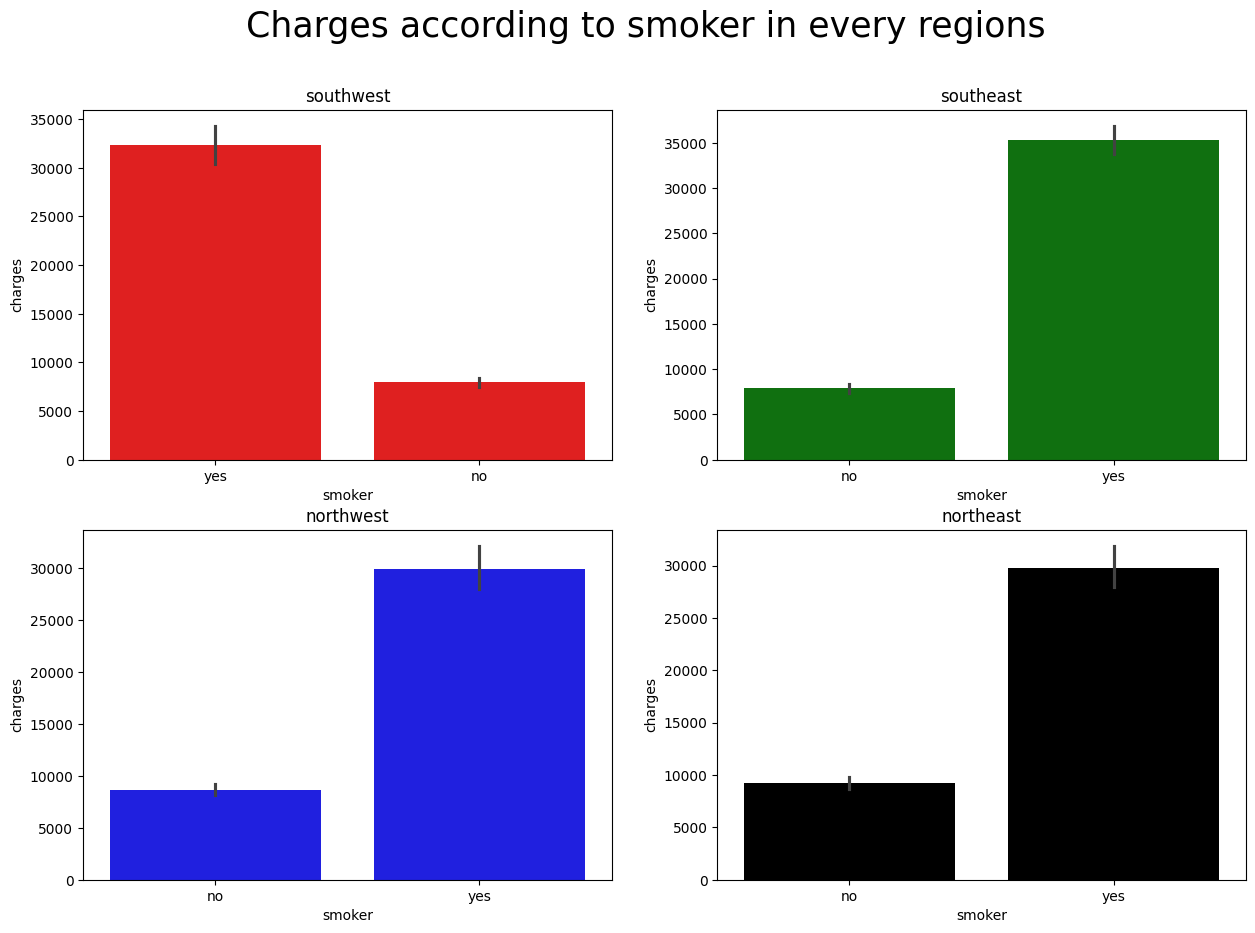

In [15]:
visu('smoker')

we can see that the mean charges of smokers, almost everywhere is high, compared to non-smokers

from visualization we can see that a person who smokes will certainly have a higher insurance cost.<br>
Lets prove this statistically by point biseral method as the smoker column is a binary column with a binary categorical variable 
And charges is a continuous numerical variable

In [16]:
from scipy.stats import pointbiserialr
Medical_insurance['smoker_binary']=(Medical_insurance['smoker']=='yes').astype(int)
correlation,pvalue=pointbiserialr(Medical_insurance['smoker_binary'],Medical_insurance['charges'])

In [17]:
print(f"Correlation:{correlation:.3f}")
print(f"P-value:{pvalue}")

Correlation:0.789
P-value:0.0


It has a strong positive corelation and it is statistically significant

---


<h2>Charges interms of Sex</h2>

In [18]:
def simple(category):
    sns.barplot(data=Medical_insurance,x=category,y='charges')
    plt.title(f'{category} and charges')

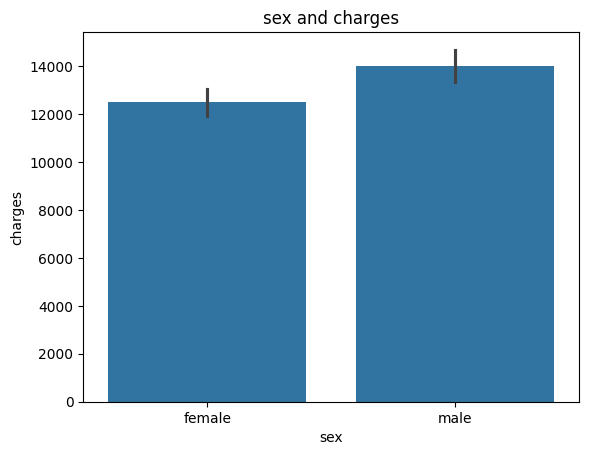

In [19]:
simple('sex')

From this chart, we can notice that, sex alone is not as strong differntiating factor for the charges.

Maybe, we can have a better understanding if we see it for different regions

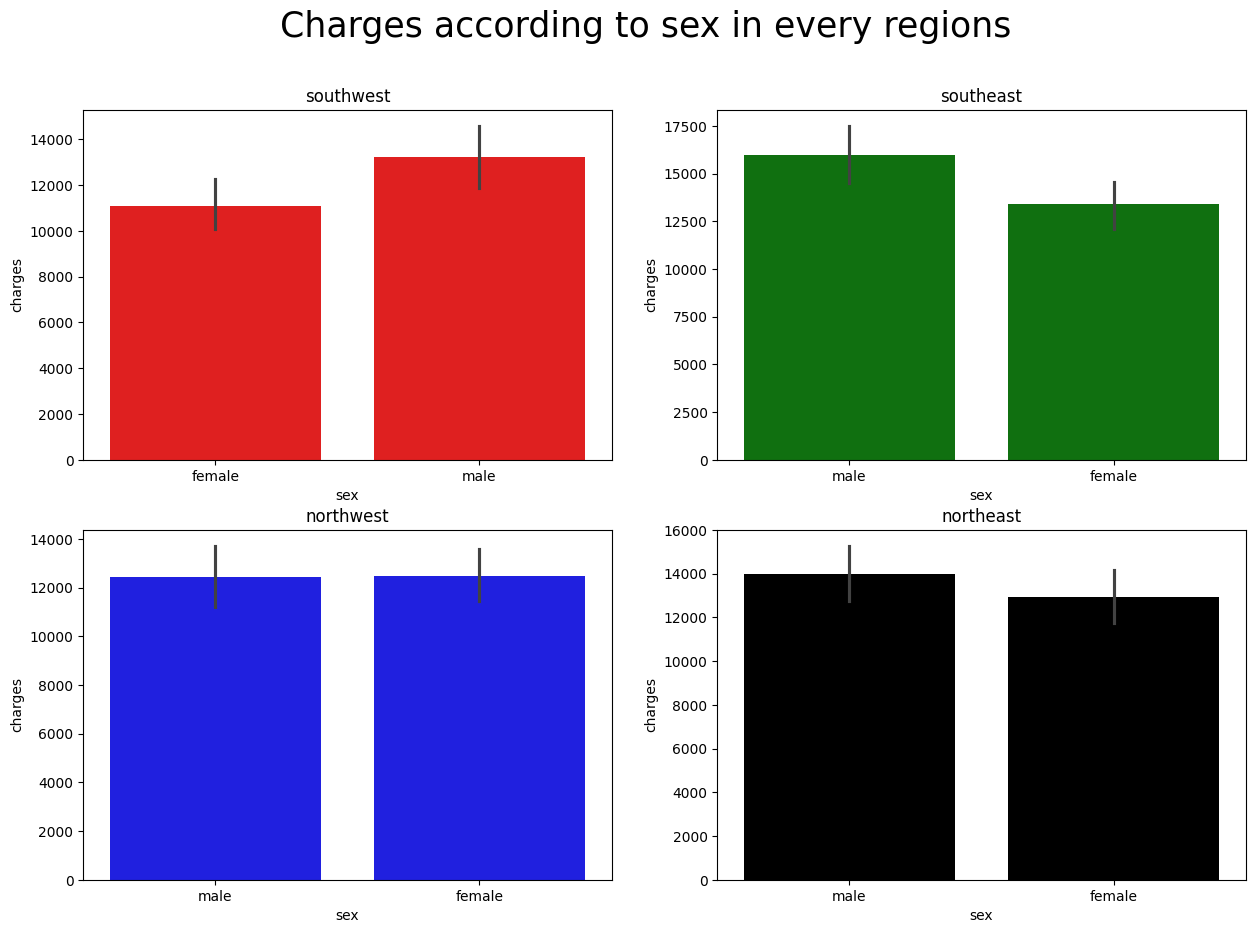

In [20]:
visu('sex')

Here, even if we see the data according to the region, we can't differentiate much in terms of sex. We notice that the mean of males is somehow larger than the mean of females in every region except at north west.

Why? Let's see the number of smokers grouped by regions and sex in every regions

In [21]:
Medical_insurance_gro=Medical_insurance.groupby(['region','sex'])['smoker'].value_counts(normalize=True)

In [22]:
Medical_insurance_gro

region     sex     smoker
northeast  female  no        0.820988
                   yes       0.179012
           male    no        0.766467
                   yes       0.233533
northwest  female  no        0.828402
                   yes       0.171598
           male    no        0.815951
                   yes       0.184049
southeast  female  no        0.796703
                   yes       0.203297
           male    no        0.706468
                   yes       0.293532
southwest  female  no        0.876471
                   yes       0.123529
           male    no        0.779070
                   yes       0.220930
Name: proportion, dtype: float64

This is due to the proportion of smoker male in northwest is comparatively low than other regions. 
This proves that smoking has most impact on the charges.

In [23]:
from scipy.stats import pointbiserialr   
Medical_insurance['Sex_binary']=(Medical_insurance['sex']=='male').astype(int)
corr, pvalue=pointbiserialr(Medical_insurance['Sex_binary'],Medical_insurance['charges'])
print(f"Point biserial correlation:{corr:.4f}")
print(f"P_value:{pvalue:.4f}")

Point biserial correlation:0.0628
P_value:0.0009


This shows that sex alone isnot correlated with charges, and we are certain about it.

---


<h2>Now according to the number of children</h2>

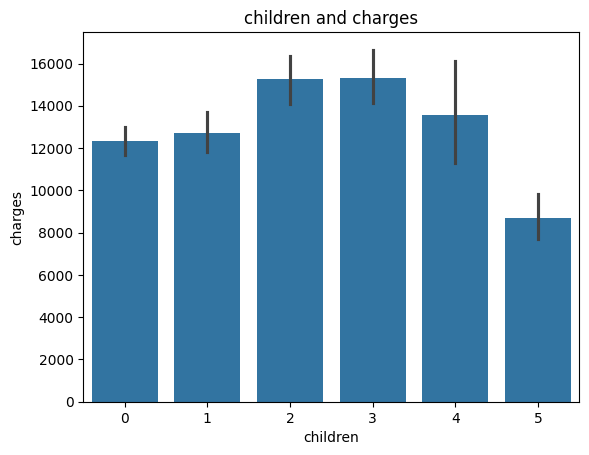

In [24]:
simple('children')

Here we can notice that only if you have 2 or 3 children your insurance cost increases, but if the number of children increases and becomes more than 3, the insurance cost starts decreasing. It seems to be a kind of quadratic relationship

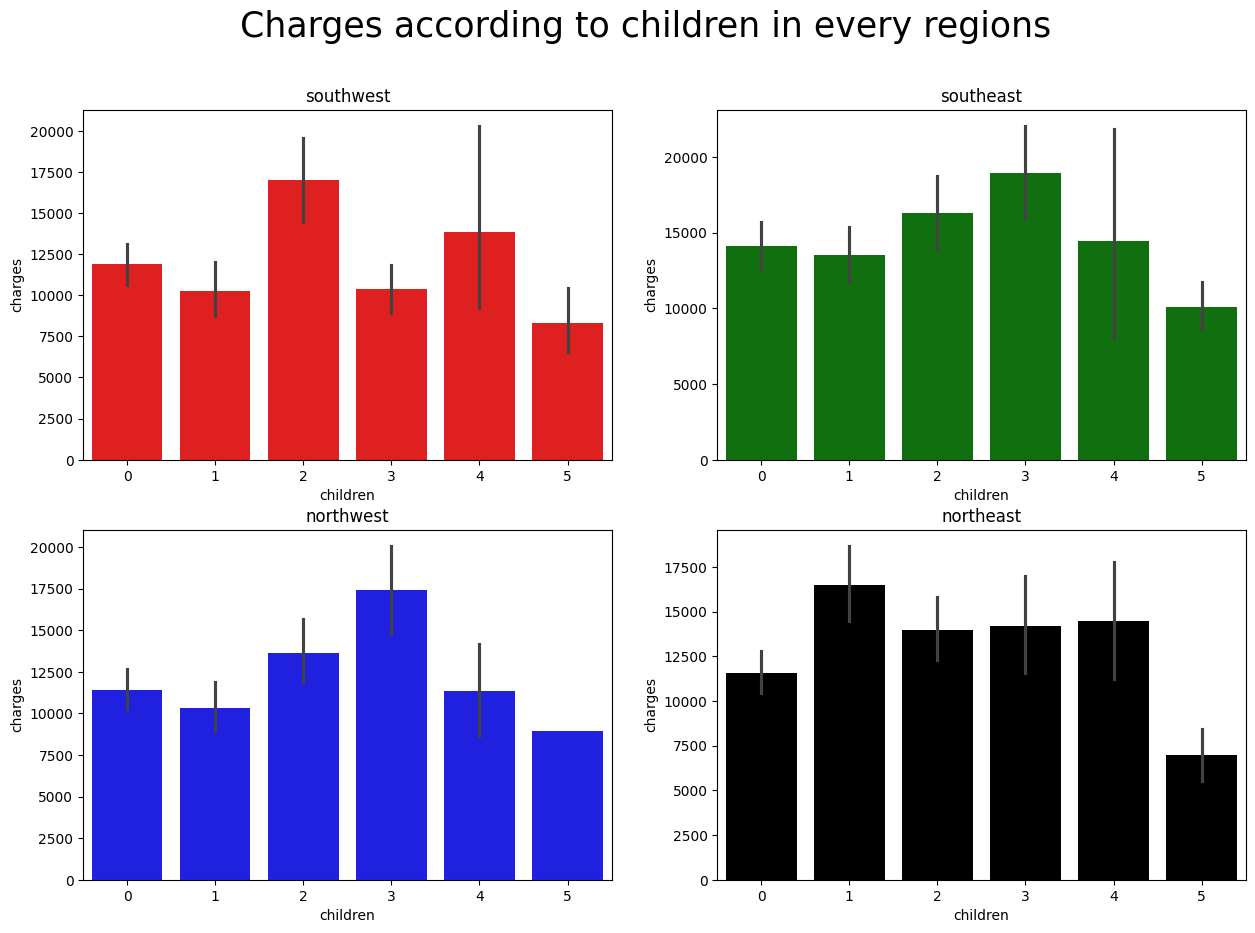

In [25]:
visu('children')

In all the regions, if you will have 5 children, your insurance cost will be least expensive (even less than when you don't have any children).
This may be due to the Government subsidies. In all the regions, the rest seems to not have much differentiating power.<br>
The relation here is clearly nonlinear <br>
In southwest, your insurance will be most expensive if you have 2 children.<br>
In northwest, if you have 3 children your insurance cost will be most expensive.<br>
In southeast, it is same as the northwest, i.e. if you have three children your insurance cost will be the most expensive<br>
In northeast, we can observe a irregular pattern, here the person with just 1 child pays the most expensive insurance
                                                                                              

The relationship here is non linear, and although the person with 5 children pays the least expensive insurance and those with 2 or 3 children pays the most expensive insurance, number of children as a whole doesn't seem to be as strong predictor as smoker.

Numerical verfication

In [26]:
Medical_insurance['children'].corr(Medical_insurance['charges'])

np.float64(0.06644231780125451)

This proves that this is a extremely weak correlation.

---

<h3> Charges with bmi </h3>

In [27]:
Medical_insurance['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

Text(0.5, 1.0, 'Scatterplot of BMI and Charges')

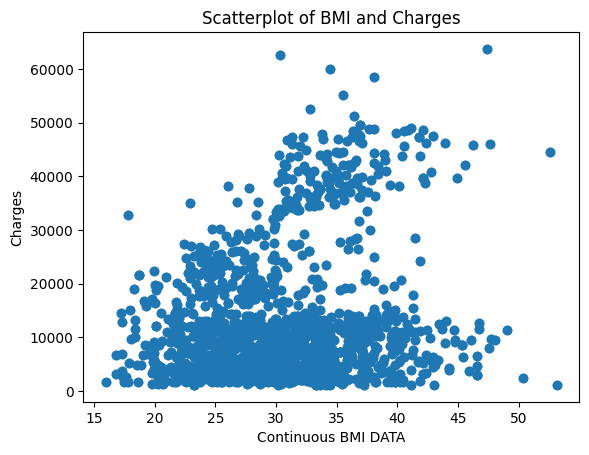

In [28]:
plt.scatter(data=Medical_insurance,x='bmi',y='charges')
plt.xlabel('Continuous BMI DATA')
plt.ylabel('Charges')
plt.title('Scatterplot of BMI and Charges')

The unique values in the BMI field is tremendous, so even if we try to visualize it, it will be very difficult for every one of us to understand it,
hence the good way to tackle this problem would be the feature engineer a new field named bmi_category and create equal sized groups using pd.qcut functions

In [29]:
Medical_insurance['bmi_category']=pd.qcut(Medical_insurance['bmi'],q=5,labels=['Very Low','Low','Medium','High','Very High'])


In [30]:
#Medical_insurance.drop(columns='bmi',inplace=True)

In [31]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low


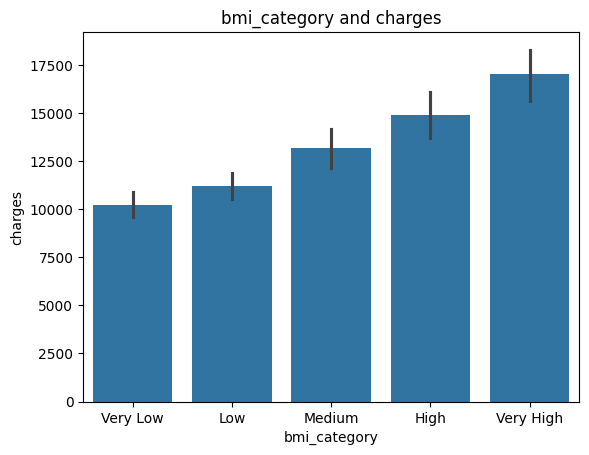

In [32]:
simple('bmi_category')

From this visualization, we can notice that the bmi_category has a very strong linear relationship with charges.

Is it same for all the regions?


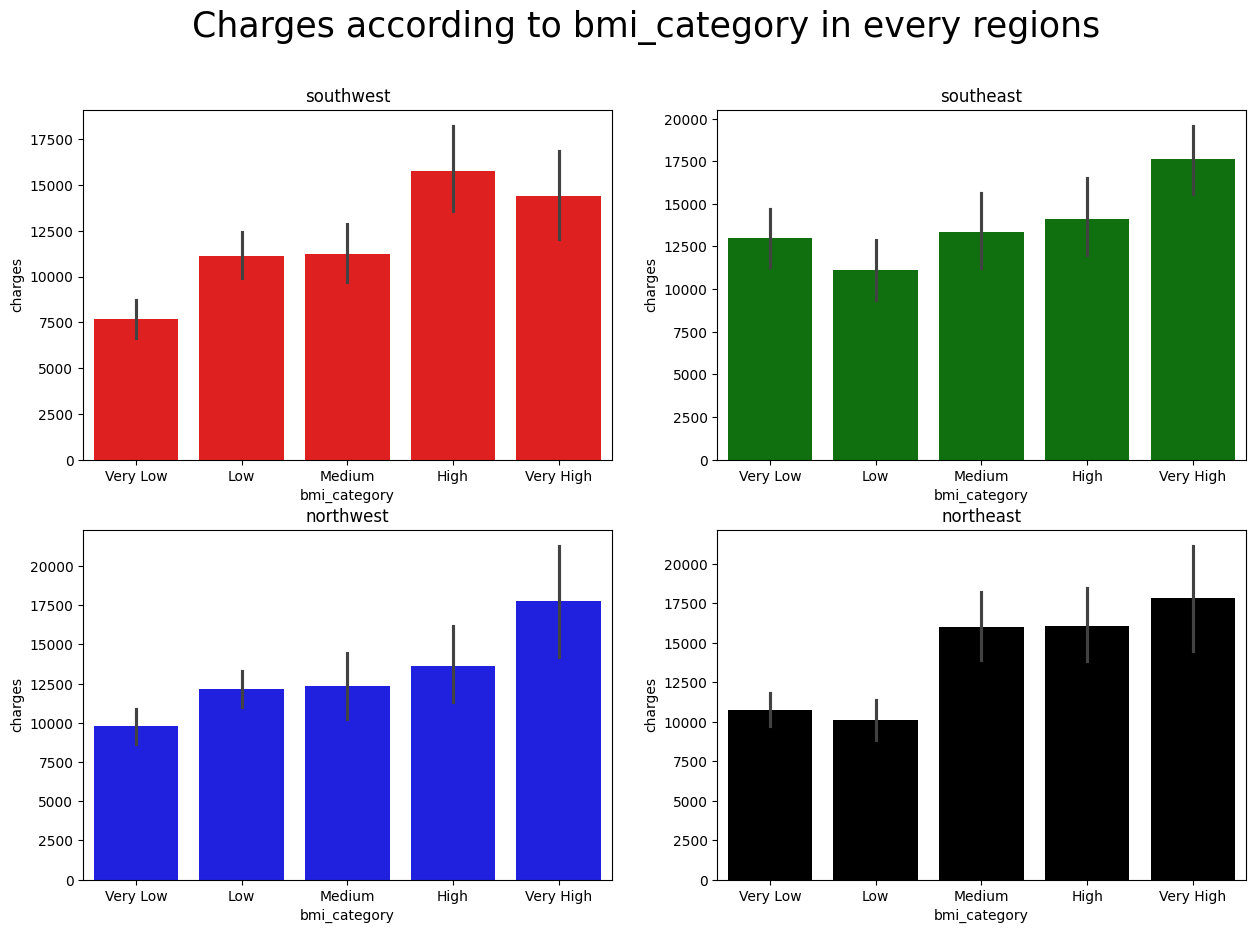

In [33]:
visu('bmi_category')

The relationship between the BMI_category and charges shows regional variation. In the Southwest and Northwest regions, there's a clear linear positive relationship, where charges increases consistently with BMI category. However, in the Southeast and Northeast regions, the pattern is slightly different:
people in the 'Low' BMI category pay the least insurance, not those in the very low category. Despite this anomaly, charges still generally increases as BMi rises from Low to very high across all regions.

What might be the possible region for this anaomaly?

In [34]:
Medical_insurance.groupby('region')['bmi_category'].value_counts()

region     bmi_category
northeast  Very Low        186
           Low             144
           Medium          128
           High            112
           Very High        88
northwest  Low             182
           Very Low        154
           Medium          140
           High            122
           Very High        66
southeast  Very High       280
           High            162
           Medium          132
           Very Low         96
           Low              96
southwest  High            156
           Low             144
           Medium          144
           Very Low        122
           Very High       118
Name: count, dtype: int64

This statistic proves that sample size is not the reason behind the anomaly of the data

In [35]:

grouped_smokers=pd.DataFrame(Medical_insurance.groupby(['region','bmi_category'])['smoker'].value_counts(normalize=True))
grouped_smokers


/var/folders/k6/dk7cqd9513v3sf54fjc78_fr0000gn/T/ipykernel_79570/3395487083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_smokers=pd.DataFrame(Medical_insurance.groupby(['region','bmi_category'])['smoker'].value_counts(normalize=True))


proportion
region    bmi_category smoker            
northeast Very Low     no        0.741935
                       yes       0.258065
          Low          no        0.861111
                       yes       0.138889
          Medium       no        0.765625
                       yes       0.234375
          High         no        0.821429
                       yes       0.178571
          Very High    no        0.795455
                       yes       0.204545
northwest Very Low     no        0.844156
                       yes       0.155844
          Low          no        0.758242
                       yes       0.241758
          Medium       no        0.842857
                       yes       0.157143
          High         no        0.868852
                       yes       0.131148
          Very High    no        0.818182
                       yes       0.181818
southeast Very Low     no        0.666667
                       yes       0.333333
          Low          no        0.750000
                       yes       0.250000
          Medium       no        0.787879
                       yes       0.212121
          High         no        0.802469
                       yes       0.197531
          Very High    no        0.728571
                       yes       0.271429
southwest Very Low     no        0.868852
                       yes       0.131148
          Low          no        0.819444
                       yes       0.180556
          Medium       no        0.861111
                       yes       0.138889
          High         no        0.743590
                       yes       0.256410
          Very High    no        0.864407
                       yes       0.135593

Typically, in north east and southeast, proportionally more people in the Very low BMI smoke, then people in the Low BMI. In other regions, proportionally
people in the Low BMI smokes more than people in the very low BMI. 
Hence this can address the anamoly of the data, we notice on the south east and northeast.
This also hints us that smoke have more effect on the insurance charges than BMI, even if BMI is statistically significant. 

We need to statistically compare this with the smoker column, and for that we are going to use the Spearman's rank correlation as the bmi_category is the ordinal data

In [36]:
from scipy.stats import spearmanr

In [37]:
bmi_mapping={'Very Low':1,'Low':2,'Medium':3,'High':4, 'Very High':5}

In [38]:
Medical_insurance['bmi_numeric']=Medical_insurance['bmi_category'].map(bmi_mapping)

In [39]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High,4
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1


In [40]:
correlation,pvalue=spearmanr(Medical_insurance['bmi_numeric'],Medical_insurance['charges'])

In [41]:
print(f"Correlation coefficient: {correlation:.3}")
print(f"Pvalue={pvalue}")

Correlation coefficient: 0.118
Pvalue=4.307291720125754e-10


These statistics tells us a completely different story.While with the visualization we thought that BMI have a very strong positive relationship with charges,
the statistics contradicts it. Although the relationship between BMI and charges are positive, it is not as strong as the positive relation between smokers and 
charges. Indeed, its 6-7 times weeker. This contradiction might have occured because we categorized the BMI into the different intervals and there were some 
evident error in the visualization as well

But as we know Smokers have a profound positive relationship with the charges, does this relationship effecting the correlation of BMI and charges?
Does for the both Smokers and Non-Smokers, does the BMI has same effect on the cost?

In [42]:
non_smokers=Medical_insurance[Medical_insurance['smoker']=='no']
coeff1, p_value1=spearmanr(non_smokers['bmi_numeric'],non_smokers['charges'])
print('Non Smokers')
print(f"Correlation coefficient:{coeff1:.3f}")
print(f"P value: {p_value1:}")

smokers=Medical_insurance[Medical_insurance['smoker']=='yes']
coeff2,p_value2=spearmanr(smokers['bmi_numeric'],smokers['charges'])
print('Smokers')
print(f"Correlation coefficient:{coeff2:.3f}")
print(f"P value: {p_value2}")

Non Smokers
Correlation coefficient:0.105
P value: 7.651395489239762e-07
Smokers
Correlation coefficient:0.829
P value: 1.0137929564762516e-143


<h4> My BMI Conclusion is changed with this statistical Analysis. The BMI correlation with charges of 0.118 was masking something very important. My guess about 
the smokers playing a role in this correlation turned out to be true.<br>
I found that the correlation of BMI and score for the smokers is 0.829<br>
And for the non smokers is 0.105<br>
This is a 8* difference between smokers and non_smokers
This analysis shows that combination of smoking and high_BMI creates a compounding effect on insurance costs, while BMI alone has a little predictive power </h4>

---


AGE WITH CHARGE

In [43]:
Medical_insurance['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [44]:
Medical_insurance['age_interval']=pd.qcut(Medical_insurance['age'],q=4)

In [45]:
Medical_insurance['age_interval'].unique()

[(17.999, 26.0], (26.0, 39.0], (39.0, 51.0], (51.0, 64.0]]
Categories (4, interval[float64, right]): [(17.999, 26.0] < (26.0, 39.0] < (39.0, 51.0] < (51.0, 64.0]]

In [46]:
Medical_insurance['age_interval']=pd.qcut(Medical_insurance['age'],q=4,labels=['Young','Early Middle Age','Late Middle Age','Seniors'])

In [47]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric,age_interval
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2,Young
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4,Young
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High,4,Early Middle Age
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1,Early Middle Age
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2,Early Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5,Late Middle Age
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4,Young
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2,Young
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1,Young


In [48]:
#Medical_insurance.drop(columns='age',inplace=True)

In [49]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric,age_interval
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2,Young
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4,Young
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High,4,Early Middle Age
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1,Early Middle Age
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2,Early Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5,Late Middle Age
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4,Young
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2,Young
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1,Young


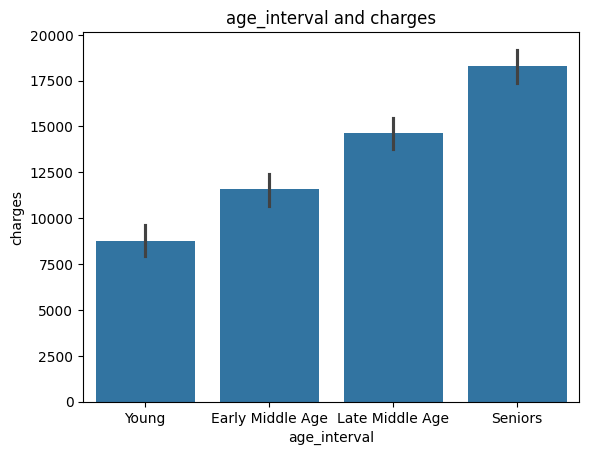

In [50]:
simple('age_interval')

We can notice that with the increase in age, the charges increases.


Now, lets move to the next step, next visualize the combined relationship of BMI, Age, and Smokers on chargers

In [51]:
Medical_insurance.groupby(['bmi_category','age_interval','smoker'])['charges'].mean()

/var/folders/k6/dk7cqd9513v3sf54fjc78_fr0000gn/T/ipykernel_79570/480559772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Medical_insurance.groupby(['bmi_category','age_interval','smoker'])['charges'].mean()


bmi_category  age_interval      smoker
Very Low      Young             no         4042.985058
                                yes       15952.737729
              Early Middle Age  no         6701.256600
                                yes       18366.230378
              Late Middle Age   no         8875.324505
                                yes       21678.677422
              Seniors           no        13394.271147
                                yes       24561.551277
Low           Young             no         4064.094660
                                yes       18303.467019
              Early Middle Age  no         5387.738605
                                yes       20031.305120
              Late Middle Age   no        10296.678027
                                yes       25533.855933
              Seniors           no        13915.390519
                                yes       27885.786431
Medium        Young             no         4021.322286
                          

Text(0.5, 0.98, "BMI's of Smokers and Non-smokers effect on Age")

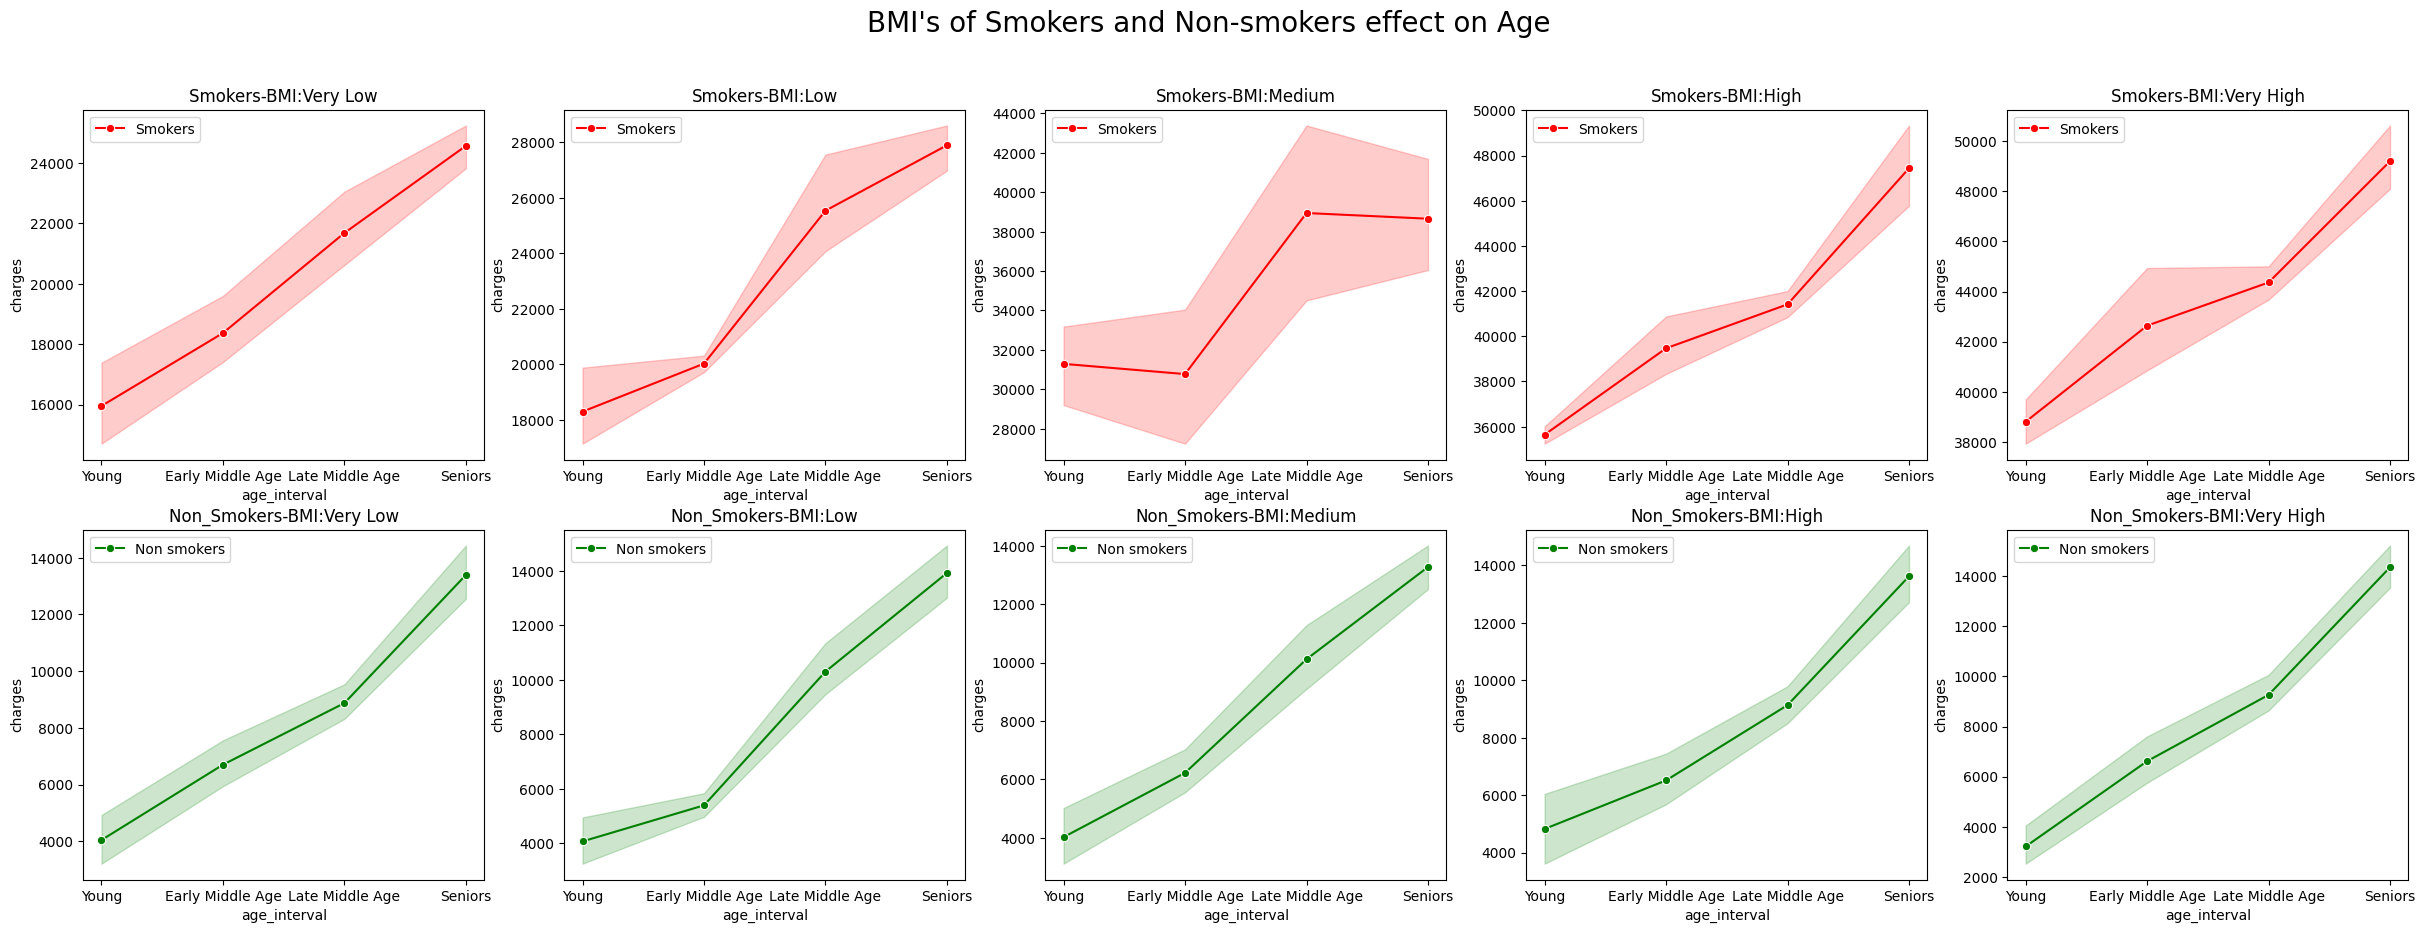

In [52]:
fig,ax=plt.subplots(2,5,figsize=(30,10))
axes=ax.flatten()
bmi=['Very Low','Low','Medium','High','Very High']


for i,bmi_cat in enumerate(bmi):
    bmi_data=Medical_insurance[Medical_insurance['bmi_category']==bmi_cat]
    #splitting smokers and non_smokers
    smokers=bmi_data[bmi_data['smoker']=='yes']
    nonsmokers=bmi_data[bmi_data['smoker']=='no']
    #smokers
    sns.lineplot(x=smokers['age_interval'],y=smokers['charges'],marker='o',label='Smokers',color='red',ax=axes[i])
    axes[i].set_title(f'Smokers-BMI:{bmi_cat}')
    axes[i].set_xlabel('age_interval')
    axes[i].set_ylabel('charges')

    #nonsmokers
    sns.lineplot(x=nonsmokers['age_interval'],y=non_smokers['charges'],marker='o',color='Green',label='Non smokers',ax=axes[i+5])
    axes[i+5].set_title(f'Non_Smokers-BMI:{bmi_cat}')
    axes[i+5].set_xlabel('age_interval')
    axes[i+5].set_ylabel('charges')
plt.suptitle("BMI's of Smokers and Non-smokers effect on Age",fontsize=20)



The primary observation is that Smoker Status is the most dominant factor determining insurance charges, causing the average cost to increase by tens of thousands of dollars compared to non-smokers. Within both smoker and non-smoker groups, charges exhibit a positive correlation with Age and are further modulated upward by increasing BMI categories.

<h2> My exploratory Data Analysis Conclusion</h2>

1. I noticed that smoker and charges have a strong positive relationship and it is statistically significant(proved by point biserialr test).
2. Visually, I found out that sex alone can't differentiate much, although the mean of males almost everywhere is higher than the mean of female, except at northwest.<br>
This is due to the proportion of smoker male in northwest is comparatively low than other regions. This shows smoking has the most impact on the charges as the apparent male-female differences are primarily driven by different smoking rates between sexes, particularly evident when comparing regions. This claim was supported by point biserial r test.
3. Insurance seem to have a non linear relationship (maybe a type of quadratic relationship with peak near 2 or 3)with children:the person with 5 children pays the least expensive insurance and those with 2 or 3 children pays the most expensive insurance. As a whole, this also doesn't seem to be as strong predictor as smoker.
4. In terms of visualization, in BMI we didn't see much effect on charges and the spearman rank correlation also backed it. But as I was not satisfied with it, I tried to find the relationship of BMI and charges of Smokers and Non smokers. I guessed that smokers played a key role in masking the correlation of bmi and charges turned out to be true.
From seperate statistical analysis of Smokers and Non smokers, I found out that<br>
The correlation of BMI and score for the smokers is 0.829 <br>
For the non smokers is 0.105<br>
This was a 8* difference between smokers and non_smokers. This analysis showed me that the combination of smoking and high_BMI creates a compounding effect on insurance costs, while BMI alone has a little effect or predicting power on it.
5. While analysing age column, I found out that the Smoker Status is the most dominant factor in determining insurance charges, causing the average cost to increase by tens of thousands of dollars compared to non-smokers. Within both smokers and non-smokers group BMI and age both independently predict charges(with smoking being the strongest).

---


---


Now, lets just transform the dataset


In [53]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric,age_interval
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2,Young
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4,Young
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High,4,Early Middle Age
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1,Early Middle Age
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2,Early Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5,Late Middle Age
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4,Young
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2,Young
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1,Young


From the Exploratory data analysis we came to the conclusion that if the person smokes and has a high BMI, his insurance charges would compound. Based on that founding, we are going 
to feature engineer a new column named bmi_smoker interaction.

In [54]:
Medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            2772 non-null   int64   
 1   sex            2772 non-null   object  
 2   bmi            2772 non-null   float64 
 3   children       2772 non-null   int64   
 4   smoker         2772 non-null   object  
 5   region         2772 non-null   object  
 6   charges        2772 non-null   float64 
 7   smoker_binary  2772 non-null   int64   
 8   Sex_binary     2772 non-null   int64   
 9   bmi_category   2772 non-null   category
 10  bmi_numeric    2772 non-null   category
 11  age_interval   2772 non-null   category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 203.8+ KB


In [55]:
Medical_insurance['bmi_numeric']=Medical_insurance['bmi_numeric'].astype(int)

In [56]:
Medical_insurance['smoker_bmi_interaction']=(Medical_insurance['smoker_binary']*Medical_insurance['bmi'])
Medical_insurance['age_smoker_interaction']=(Medical_insurance['age']*Medical_insurance['smoker_binary'])

In [57]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric,age_interval,smoker_bmi_interaction,age_smoker_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2,Young,27.90,19
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4,Young,0.00,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,High,4,Early Middle Age,0.00,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1,Early Middle Age,0.00,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2,Early Middle Age,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5,Late Middle Age,0.00,0
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4,Young,0.00,0
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2,Young,26.03,19
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1,Young,0.00,0


Now from my EDA, I had figured out that the relation of number of children and insurance charges is non linear(maybe a quadratic one).
Hence I am going to sqaure my children's number.


In [58]:
Medical_insurance['children']=Medical_insurance['children']**2

In [59]:
Medical_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_binary,Sex_binary,bmi_category,bmi_numeric,age_interval,smoker_bmi_interaction,age_smoker_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,Low,2,Young,27.90,19
1,18,male,33.770,1,no,southeast,1725.55230,0,1,High,4,Young,0.00,0
2,28,male,33.000,9,no,southeast,4449.46200,0,1,High,4,Early Middle Age,0.00,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,Very Low,1,Early Middle Age,0.00,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,Low,2,Early Middle Age,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,Very High,5,Late Middle Age,0.00,0
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,High,4,Young,0.00,0
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,Low,2,Young,26.03,19
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,Very Low,1,Young,0.00,0


Dropping the target and redundant column

In [60]:
columns_to_drop=['charges','sex','Sex_binary','smoker','bmi_category','bmi_numeric','age_interval']

In [61]:
X=Medical_insurance.drop(columns_to_drop,axis=1)
Y=Medical_insurance['charges']



Note: For preparing my dataset for ML, I dropped certain columns like BMI category and Age interval, which were very crucial to me during my Data Visualization Process
I did that because if I would have prepared my model with that categorical data, my model's accuracy would have suffered as the category will be the reason behind the information loss.
Hence for my ML models, I am moving on with the same continuous data I had in the beginning for my model creation. Here I dropped sex binary as well as it didn't had much effect on its own and was just masking the effect of smoking, which was visible when mean charges of male was less than female at northwest due to the proportion of smoker female was high.

<h2>Now splitting the Dataset, and starting the ML process</h2>

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=X['smoker_binary'],random_state=42)

As we had figured out smoking was the highest driving factor of insurance charges, for a fair model evaluation we had to ensure it was the part of our testing dataset as well in somehow 
equal proportion as our training dataset, hence we used stratify in train_test_splitting

In [64]:
print(f"x training shape:{x_train.shape}")
print(f"x test shape:{x_test.shape}")
print(f"y train shape:{y_train.shape}")
print(f"y test shape:{y_test.shape}")

x training shape:(2217, 7)
x test shape:(555, 7)
y train shape:(2217,)
y test shape:(555,)


Now lets do some one hot encoding to the region column

In [65]:
region_train=pd.get_dummies(x_train['region'],prefix='region',drop_first=True)

In [66]:
region_test=pd.get_dummies(x_test['region'],prefix='region',drop_first=True)

In [67]:
region_train

,region_northwest,region_southeast,region_southwest
1291,False,False,True
1334,False,False,False
466,False,False,True
863,False,False,False
1936,False,False,True
...,...,...,...
1724,False,False,False
2731,False,False,True
908,False,False,True
1044,False,False,False


In [68]:
x_train=x_train.drop('region',axis=1)

x_test=x_test.drop('region',axis=1)


In [69]:
x_train=pd.concat([x_train.reset_index(drop=True),region_train.reset_index(drop=True)],axis=1)


In [70]:
x_train

,age,bmi,children,smoker_binary,smoker_bmi_interaction,age_smoker_interaction,region_northwest,region_southeast,region_southwest
0,19,34.900,0,1,34.90,19,False,False,True
1,18,31.920,0,0,0.00,0,False,False,False
2,60,28.700,1,0,0.00,0,False,False,True
3,36,19.855,0,0,0.00,0,False,False,False
4,63,30.800,0,0,0.00,0,False,False,True
...,...,...,...,...,...,...,...,...,...
2212,50,32.300,1,1,32.30,50,False,False,False
2213,30,35.300,0,1,35.30,30,False,False,True
2214,63,39.800,9,0,0.00,0,False,False,True
2215,55,35.245,1,0,0.00,0,False,False,False


In [71]:
x_test=pd.concat([x_test.reset_index(drop=True),region_test.reset_index(drop=True)],axis=1)


In [72]:
x_test

,age,bmi,children,smoker_binary,smoker_bmi_interaction,age_smoker_interaction,region_northwest,region_southeast,region_southwest
0,60,36.005,0,0,0.00,0,False,False,False
1,56,27.200,0,0,0.00,0,False,False,True
2,60,32.450,0,1,32.45,60,False,True,False
3,19,21.700,0,1,21.70,19,False,False,True
4,19,30.020,0,1,30.02,19,True,False,False
...,...,...,...,...,...,...,...,...,...
550,25,24.130,0,1,24.13,25,True,False,False
551,40,32.300,4,0,0.00,0,True,False,False
552,25,20.800,1,0,0.00,0,False,False,True
553,42,37.180,4,0,0.00,0,False,True,False


In [73]:
y_train.max()

np.float64(63770.42801)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [75]:
rf=RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, random_state=42)

In [76]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
score=rf.score(x_test,y_test)

In [78]:
score

0.9075808456752257

Residual plot for checking overfitting

In [79]:
y_test_pred=rf.predict(x_test)
residuals=y_test-y_test_pred

Text(0.5, 1.0, 'Residual plot')

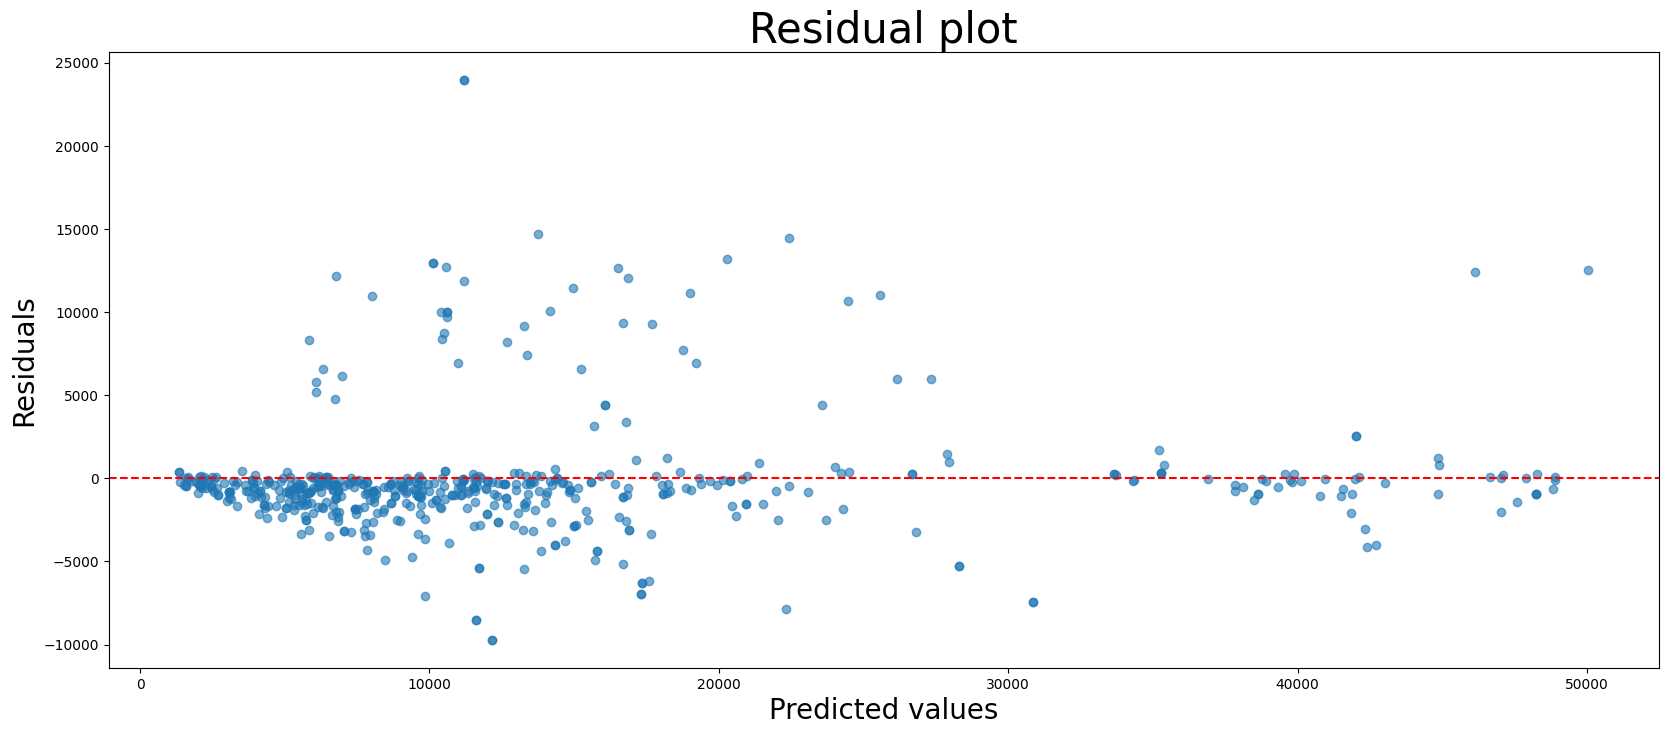

In [80]:
plt.figure(figsize=(20,8))
plt.scatter(y_test_pred,residuals,alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values',fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residual plot',fontsize=30)

We can't notice much pattern in this residual plot, but there are still some points for improvements

USE A PIPELINE FOR STANDARD SCALING, and RF THAT MAY HELP

In [81]:
x_train

,age,bmi,children,smoker_binary,smoker_bmi_interaction,age_smoker_interaction,region_northwest,region_southeast,region_southwest
0,19,34.900,0,1,34.90,19,False,False,True
1,18,31.920,0,0,0.00,0,False,False,False
2,60,28.700,1,0,0.00,0,False,False,True
3,36,19.855,0,0,0.00,0,False,False,False
4,63,30.800,0,0,0.00,0,False,False,True
...,...,...,...,...,...,...,...,...,...
2212,50,32.300,1,1,32.30,50,False,False,False
2213,30,35.300,0,1,35.30,30,False,False,True
2214,63,39.800,9,0,0.00,0,False,False,True
2215,55,35.245,1,0,0.00,0,False,False,False


In [82]:
numeric_features=['age','bmi','children','smoker_bmi_interaction','age_smoker_interaction']


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[('num_scaler',StandardScaler(),numeric_features)])

In [84]:
my_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',rf)])

In [85]:
my_pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [86]:
my_pipeline.score(x_test,y_test)

0.907622235573149

In [87]:
param_grid={'regressor__n_estimators':[100,200,300],
            'regressor__max_depth':[10,20,25,None],
            'regressor__min_samples_split':[2,5,10,15]
            }

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid_search=GridSearchCV(
    estimator=my_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

In [90]:
grid_search.fit(x_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [10, 20, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_scaler', ...)]"


In [91]:
best_model=grid_search.best_estimator_

In [92]:
ypred=best_model.predict(x_test)

In [93]:
print(f"{r2_score(y_test,ypred)}")

0.946763756874919


In [94]:
residuals2=y_test-ypred

Text(0.5, 1.0, 'Residual plot (Tuned)')

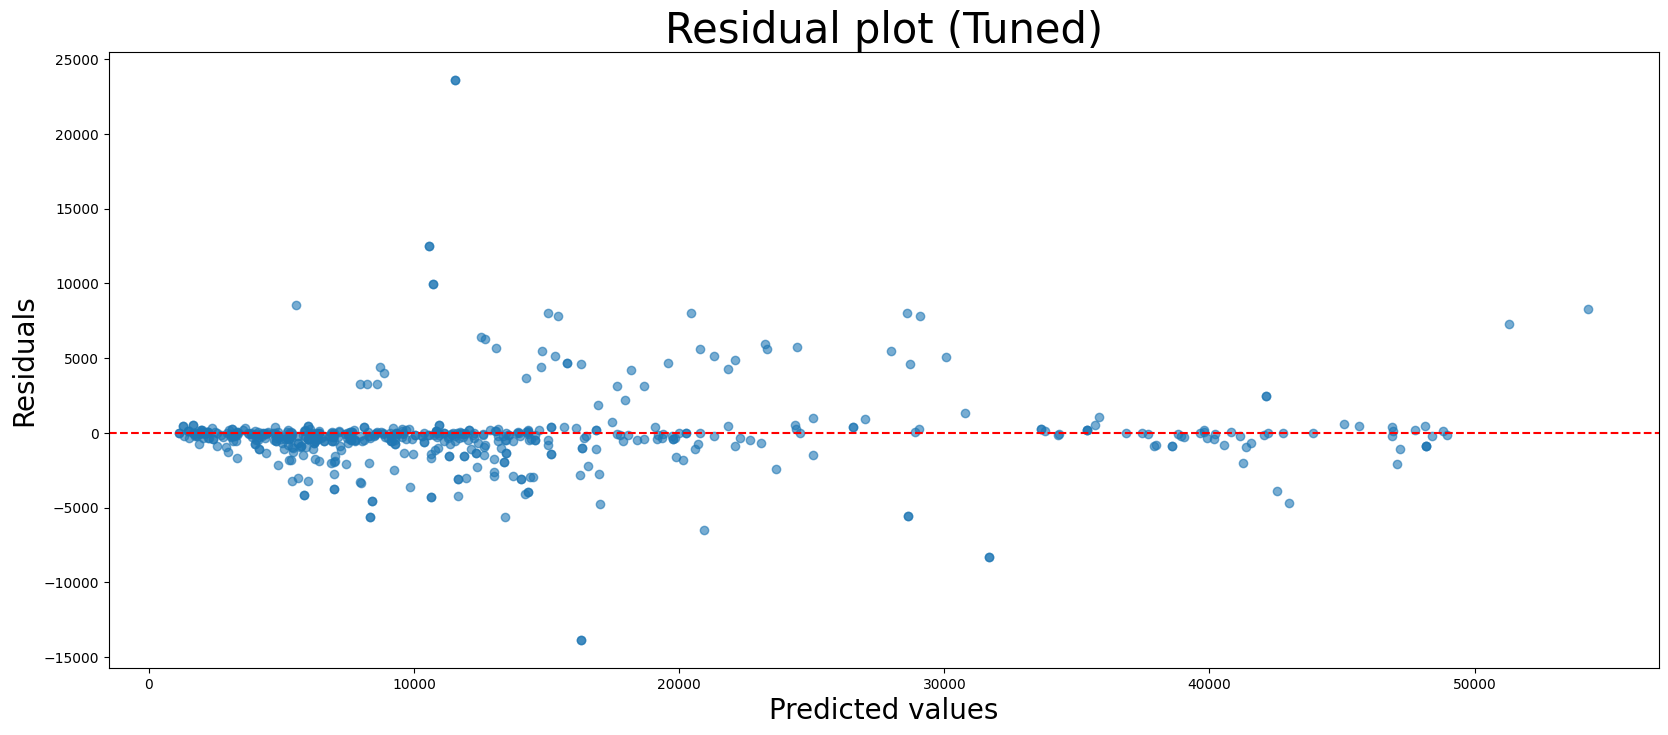

In [95]:
plt.figure(figsize=(20,8))
plt.scatter(ypred,residuals2,alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values',fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residual plot (Tuned)',fontsize=30)

Hence I got the model R^2 value of 0.946.